In [7]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

content = np.array([])

from bs4 import BeautifulSoup
import requests

url = "https://inform.tmforum.org/tag/ai-data-insights/"

article_links = []

for j in range(1,8):
    req = requests.get(f"https://inform.tmforum.org/tag/ai-data-insights/page/{j}/")
    soup = BeautifulSoup(req.text, "html.parser")
    for i in soup.select(".article-item__title-link"):
        article_links.append(i.get("href"))


# print(article_links)

In [8]:
text = []
for i in article_links:
    req = requests.get(i)
    soup = BeautifulSoup(req.text, "html.parser")
    text.append(''.join(soup.select(".content")[0].strings))
    # text.append(driver.find_element_by_class_name("post_title").text)


content = np.array(text)

# print(content)

In [9]:
df = pd.DataFrame(content)
df.to_csv("data.csv")


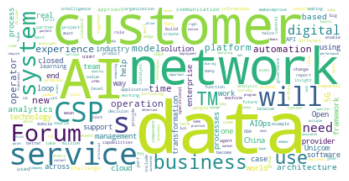

In [11]:
from gensim.parsing.preprocessing import remove_stopwords
string = ''.join(text)
t1 = remove_stopwords(string)

t1 = t1.lower()
remove_digits = 1
pattern = r'[^a-zA-Z0-9\s]' if not remove_digits else r'[^a-zA-Z\s]'
import re
t1 = re.sub(pattern, '', t1)

word_cloud1 = WordCloud(collocations = False, background_color = 'white').generate(string)
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()


In [12]:
from google.cloud import storage
#pip install --upgrade google-cloud-storage. 
def upload_to_bucket(blob_name, path_to_file, bucket_name):
    """ Upload data to a bucket"""
     
    # Explicitly use service account credentials by specifying the private key
    # file.
    storage_client = storage.Client.from_service_account_json(
        "C:\Users\sachm\Downloads\service-account-capstone.json")

    #print(buckets = list(storage_client.list_buckets())

    bucket = storage_client.get_bucket(bucket_name)
    blob = bucket.blob(blob_name)
    blob.upload_from_filename(path_to_file)
    
    #returns a public url
    return blob.public_url




upload_to_bucket("wordcloud_data", )